In [74]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
from imblearn.over_sampling import SMOTE

In [55]:
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Описание данных

#### В анализ взяты данные по прямым маркетинговым кампаниям (телефонный обзвон) португальского банковского учреждения

#### ***Целевая переменная:*** подписался ли клиент на срочный вклад (двоично: “1” означает “Да”, “0” означает “Нет”)

In [83]:
data = pd.read_csv('../lab2/data.csv')
data.shape

(41188, 21)

In [84]:
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,high.school,unknown,no,yes,telephone,jun,thu,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.866,5228.1,0
41184,31,housemaid,married,basic.4y,unknown,no,no,telephone,may,thu,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0,0
41185,42,admin.,single,university.degree,unknown,yes,yes,telephone,may,wed,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
41186,48,technician,married,professional.course,no,no,yes,telephone,oct,tue,...,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,0


0    36548
1     4640
Name: y, dtype: int64


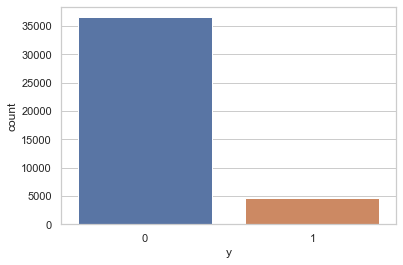

In [85]:
print(data['y'].value_counts())

sns.countplot(x='y', data=data)
plt.show();

In [161]:
count_no_sub = len(data[data['y']==0])
count_sub = len(data[data['y']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("Процент не подписавшихся: ", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("Процент подписок: ", pct_of_sub*100)

Процент не подписавшихся:  88.73458288821988
Процент подписок:  11.265417111780131


In [87]:
data.groupby('y').mean()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


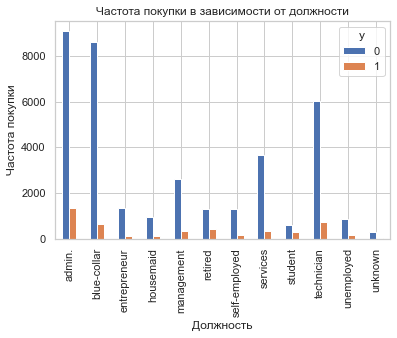

In [88]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Частота покупки в зависимости от должности')
plt.xlabel('Должность')
plt.ylabel('Частота покупки');

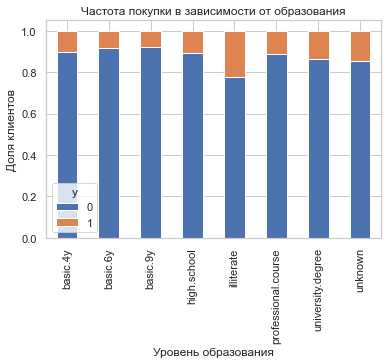

In [89]:
table = pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Частота покупки в зависимости от образования')
plt.xlabel('Уровень образования')
plt.ylabel('Доля клиентов');

In [90]:
data['education'] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])
data['education'] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])

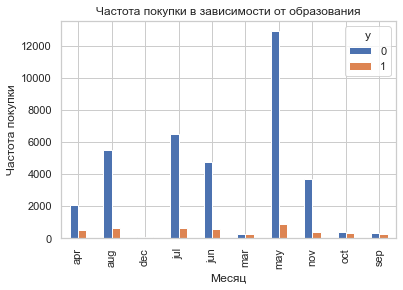

In [91]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Частота покупки в зависимости от образования')
plt.xlabel('Месяц')
plt.ylabel('Частота покупки');

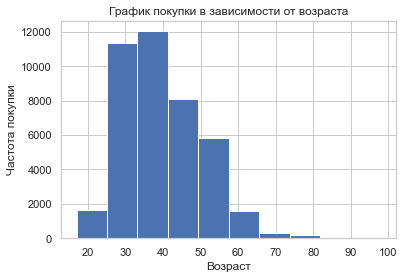

In [92]:
data.age.hist()
plt.title('График покупки в зависимости от возраста')
plt.xlabel('Возраст')
plt.ylabel('Частота покупки');

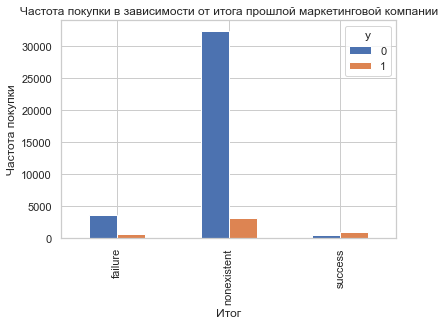

In [93]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Частота покупки в зависимости от итога прошлой маркетинговой компании')
plt.xlabel('Итог')
plt.ylabel('Частота покупки');

In [94]:
cat_vars = ['job','education','month','poutcome']
for var in cat_vars:
    cat_list = 'var' + '_' + var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1 = data.join(cat_list)
    data = data1
    
cat_vars = ['job','education','month','poutcome']
data_vars = data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [95]:
data_final = data[to_keep]
data_final.columns.values

array(['age', 'marital', 'default', 'housing', 'loan', 'contact',
       'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y', 'job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management',
       'job_retired', 'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'education_Basic', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_failure',
       'poutcome_nonexistent', 'poutcome_success'], dtype=object)

In [113]:
for cols in data_final: 
    if type(data_final[cols][0]) is str: 
        data_final[cols] = pd.factorize(data_final[cols])[0]

C:\Users\user\AppData\Local\Temp\ipykernel_16080\3063763335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_final[cols] = pd.factorize(data_final[cols])[0]


In [163]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y = os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y = pd.DataFrame(data=os_data_y,columns=['y'])

print("Мощность данных после дублирования  ",len(os_data_X))
print("Количество неподписавшихся в новых данных ",len(os_data_y[os_data_y['y']==0]))
print("Количество подписок ",len(os_data_y[os_data_y['y']==1]))
print("Соотношение неподписавшихся к общему ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Соотношение подписавшихся к общему ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

Мощность данных после дублирования   51134
Количество неподписавшихся в новых данных  25567
Количество подписок  25567
Соотношение неподписавшихся к общему  0.5
Соотношение подписавшихся к общему  0.5


In [117]:
data_final_vars=data_final.columns.values.tolist()
y=['y']
X=[i for i in data_final_vars if i not in y]

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, step = 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

[False  True False  True  True  True False False False False  True  True
 False False False False  True  True  True False  True False  True  True
 False  True False False  True  True False  True  True  True  True  True
 False False False False  True  True False False  True False False]
[3 1 3 1 1 1 2 3 2 3 1 1 2 3 2 3 1 1 1 3 1 3 1 1 3 1 3 3 1 1 3 1 1 1 1 1 3
 3 3 3 1 1 3 3 1 3 3]


In [128]:
column_list = []
for i in range(len(rfe.support_)):
    if rfe.support_[i] == True:
        column_list.append(X[i])

In [129]:
column_list

['marital',
 'housing',
 'loan',
 'contact',
 'previous',
 'emp_var_rate',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_management',
 'job_self-employed',
 'job_services',
 'job_technician',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'month_apr',
 'month_aug',
 'month_may',
 'month_nov',
 'poutcome_failure']

In [130]:
X=os_data_X[column_list]
y=os_data_y['y']

In [131]:
import statsmodels.api as sm

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442278
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.362     
Dependent Variable:      y                    AIC:                  45276.9162
Date:                    2023-02-26 22:55     BIC:                  45480.2869
No. Observations:        51134                Log-Likelihood:       -22615.   
Df Model:                22                   LL-Null:              -35443.   
Df Residuals:            51111                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [133]:
column_list = ['marital',
 'housing',
 'loan',
 'contact',
 'previous',
 'emp_var_rate',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_management',
 'job_self-employed',
 'job_services',
 'job_technician',
 'education_Basic',
 'education_high.school',
 'education_professional.course',
 'education_university.degree',
 'education_unknown',
 'month_aug',
 'month_may',
 'month_nov',
 'poutcome_failure']

In [134]:
X=os_data_X[column_list]
y=os_data_y['y']

logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442294
         Iterations 7
                                Results: Logit
Model:                   Logit                Pseudo R-squared:     0.362     
Dependent Variable:      y                    AIC:                  45276.5094
Date:                    2023-02-26 22:57     BIC:                  45471.0379
No. Observations:        51134                Log-Likelihood:       -22616.   
Df Model:                21                   LL-Null:              -35443.   
Df Residuals:            51112                LLR p-value:          0.0000    
Converged:               1.0000               Scale:                1.0000    
No. Iterations:          7.0000                                               
------------------------------------------------------------------------------
                               Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------

In [135]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()

LogisticRegression()


In [139]:
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.89


In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7138  528]
 [1134 6541]]


In [162]:
print('Error: ', np.mean((y_pred - y_test) ** 2))

Error:  0.10833713577993612


In [ ]:
res = pd.DataFrame({'test':y_test, 'pred':y_pred})

In [ ]:
res['result'] = res['test'] == res['pred']

In [ ]:
res.loc[res.result == True, 'result'] = 'совпадают'
res.loc[res.result == False, 'result'] = 'не совпадают'

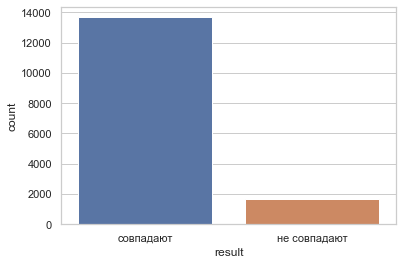

In [ ]:
sns.countplot(x='result', data=res)
plt.show();

In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90      7666
           1       0.93      0.85      0.89      7675

    accuracy                           0.89     15341
   macro avg       0.89      0.89      0.89     15341
weighted avg       0.89      0.89      0.89     15341



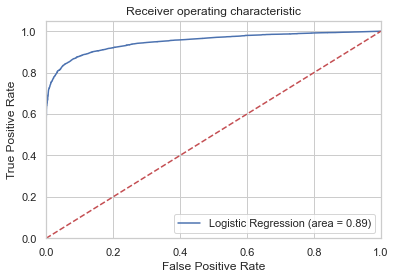

In [142]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()